In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

%matplotlib inline
pd.set_option('display.max_rows', None)

In [2]:
def df_2_html(df):
    html_table_with_scrollbar = f"""
        <div style="max-height: 300px; overflow-y: auto; overflow-x: auto; border: 1px solid #ccc;">
            {df.to_html(index=False)}
        </div>
        """
    return html_table_with_scrollbar

# Análisis preliminar de variables

Con el fin de comprender adecuadamente nuestros datos, resulta pertinente examinar cada variable e intentar dilucidar su significado y relevancia para el problema en cuestión. Este proceso puede ser laborioso; sin embargo, permitirá adquirir una visión más clara del conjunto de datos.  

## Propuesta metodológica

Para dotar de rigurosidad y disciplina a nuestro análisis, se sugiere la elaboración de una hoja de cálculo en Excel que contenga las siguientes columnas:  

- **Variable** – Denominación de la variable.  
- **Tipo** – Identificación del tipo de variable. Este campo admite dos valores posibles: *numérica* o *categórica*. Por *numérica* se entienden aquellas variables cuyos valores son números, mientras que por *categórica* aquellas cuyos valores representan categorías.  
- **Segmento** – Identificación del segmento al que pertenece la variable. Pueden definirse tres segmentos: *edificio*, *espacio* o *ubicación*.  
  - *Edificio*: características físicas de la construcción (ej. `OverallQual`).  
  - *Espacio*: propiedades espaciales de la vivienda (ej. `TotalBsmtSF`).  
  - *Ubicación*: información sobre el emplazamiento de la vivienda (ej. `Neighborhood`).  
- **Expectativa** – Nuestra estimación preliminar acerca de la influencia de la variable en `SalePrice`. Puede expresarse mediante una escala categórica con los valores *Alta*, *Media* y *Baja*.  
- **Conclusión** – Evaluación de la importancia de la variable tras una revisión preliminar de los datos. Puede utilizarse la misma escala categórica que en *Expectativa*.  
- **Comentarios** – Observaciones generales que se consideren pertinentes.  

## Relevancia de la columna *Expectativa*

Aunque las columnas *Tipo* y *Segmento* cumplen principalmente una función de referencia futura, la columna *Expectativa* es particularmente relevante, puesto que contribuye a desarrollar una suerte de “sexto sentido” analítico. Para completarla, es necesario leer la descripción de todas las variables y, una por una, plantearnos las siguientes preguntas:  

1. ¿Consideramos esta variable al momento de adquirir una vivienda?  
   - Ejemplo: ¿al pensar en la casa ideal, prestamos atención al *tipo de revestimiento de mampostería*?  
2. En caso afirmativo, ¿qué grado de importancia tendría esta variable?  
   - Ejemplo: ¿cuál sería el impacto de poseer un material exterior *Excelente* en lugar de *Deficiente*? ¿Y de tener *Excelente* en lugar de *Bueno*?  
3. ¿Está la información ya representada en otra variable?  
   - Ejemplo: si `LandContour` describe la planitud del terreno, ¿es necesario conocer también `LandSlope`?   

In [3]:
df = pd.read_csv('../data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
column_info = []
for col in df.columns:
    non_null_count = df[col].count()
    data_type = df[col].dtype
    column_info.append({'Column': col, 'Non-Null Count': non_null_count, 'Data Type': data_type})

# Create a DataFrame from the extracted information
info_df = pd.DataFrame(column_info)
# Display the HTML
display(HTML(df_2_html(info_df)))

Column,Non-Null Count,Data Type
Id,1460,int64
MSSubClass,1460,int64
MSZoning,1460,object
LotFrontage,1201,float64
LotArea,1460,int64
Street,1460,object
Alley,91,object
LotShape,1460,object
LandContour,1460,object
Utilities,1460,object


## Ingeniería de características

In [6]:
df_fe = df.copy()

# Superficies
for col in ['TotalBsmtSF','1stFlrSF','2ndFlrSF']:
    if col not in df_fe.columns:
        raise KeyError(f"Falta la columna {col} para TotalSF")
df_fe['TotalSF'] = df_fe['TotalBsmtSF'] + df_fe['1stFlrSF'] + df_fe['2ndFlrSF']

# Baños totales (ponderación estándar: 0.5 para medios baños)
df_fe['TotalBath'] = (
    df_fe.get('FullBath',0) + 0.5*df_fe.get('HalfBath',0) +
    df_fe.get('BsmtFullBath',0) + 0.5*df_fe.get('BsmtHalfBath',0)
)

# 'Functional' (mejor = Typ)
func_map = {'Typ':6,'Min1':5,'Min2':4,'Mod':3,'Maj1':2,'Maj2':1,'Sev':0,'Sal':0}
if 'Functional' in df_fe.columns:
    df_fe['Functional'] = df_fe['Functional'].map(func_map).fillna(func_map['Typ']).astype(int)

## Conociendo nuestra variable objetivo

In [7]:
#descriptive statistics summary
df_fe['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

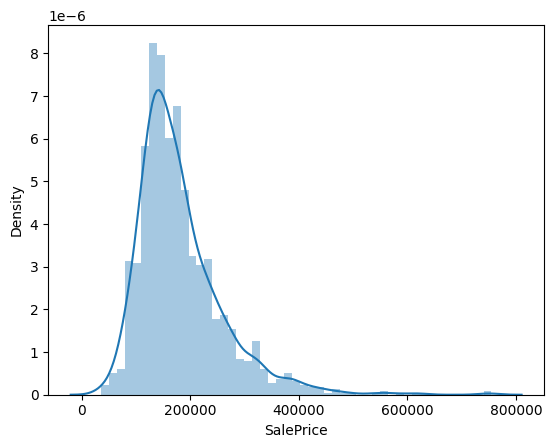

In [8]:
#histogram
sns.distplot(df_fe['SalePrice']);

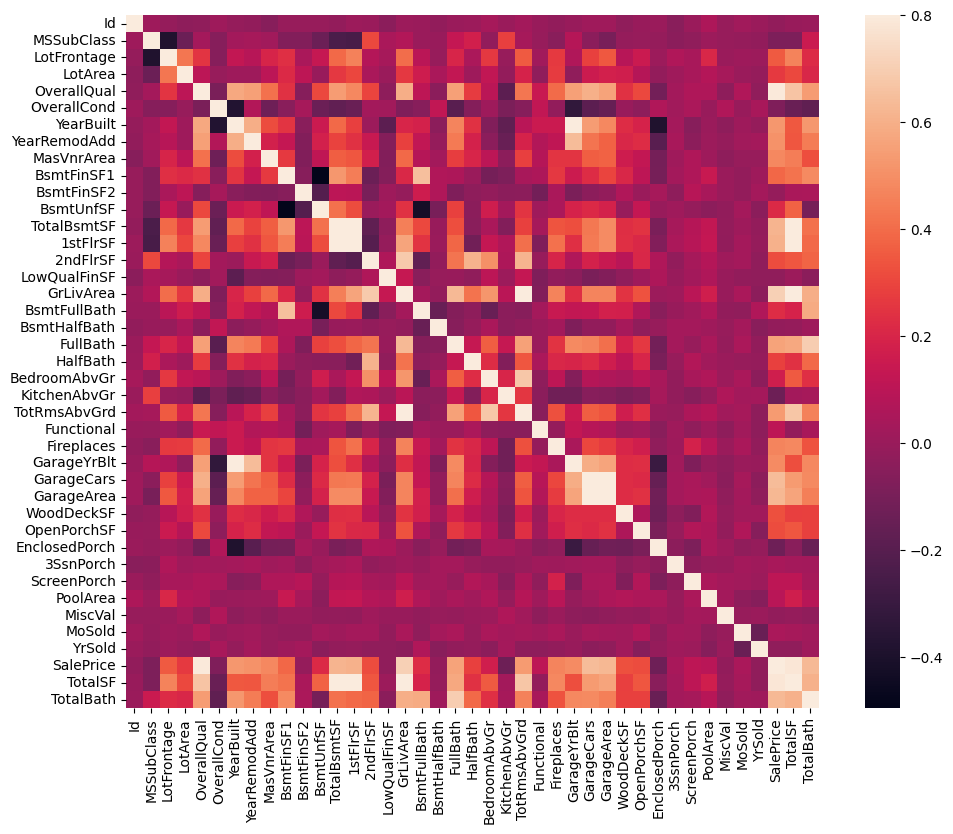

In [11]:
#correlation matrix
corrmat = df_fe.select_dtypes(include=[np.number]).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

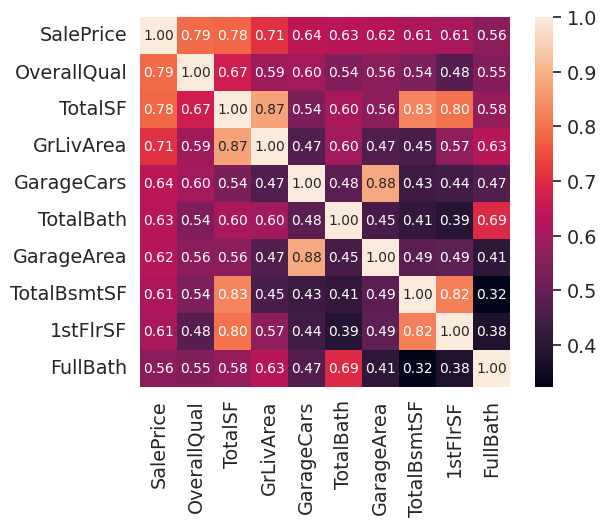

In [12]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_fe[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
num_cols = df_fe.select_dtypes(include=[np.number]).columns.tolist()
corr = df_fe[num_cols].corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
corr.head(10)

SalePrice      1.000000
OverallQual    0.790982
TotalSF        0.782260
GrLivArea      0.708624
GarageCars     0.640409
TotalBath      0.631731
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
Name: SalePrice, dtype: float64

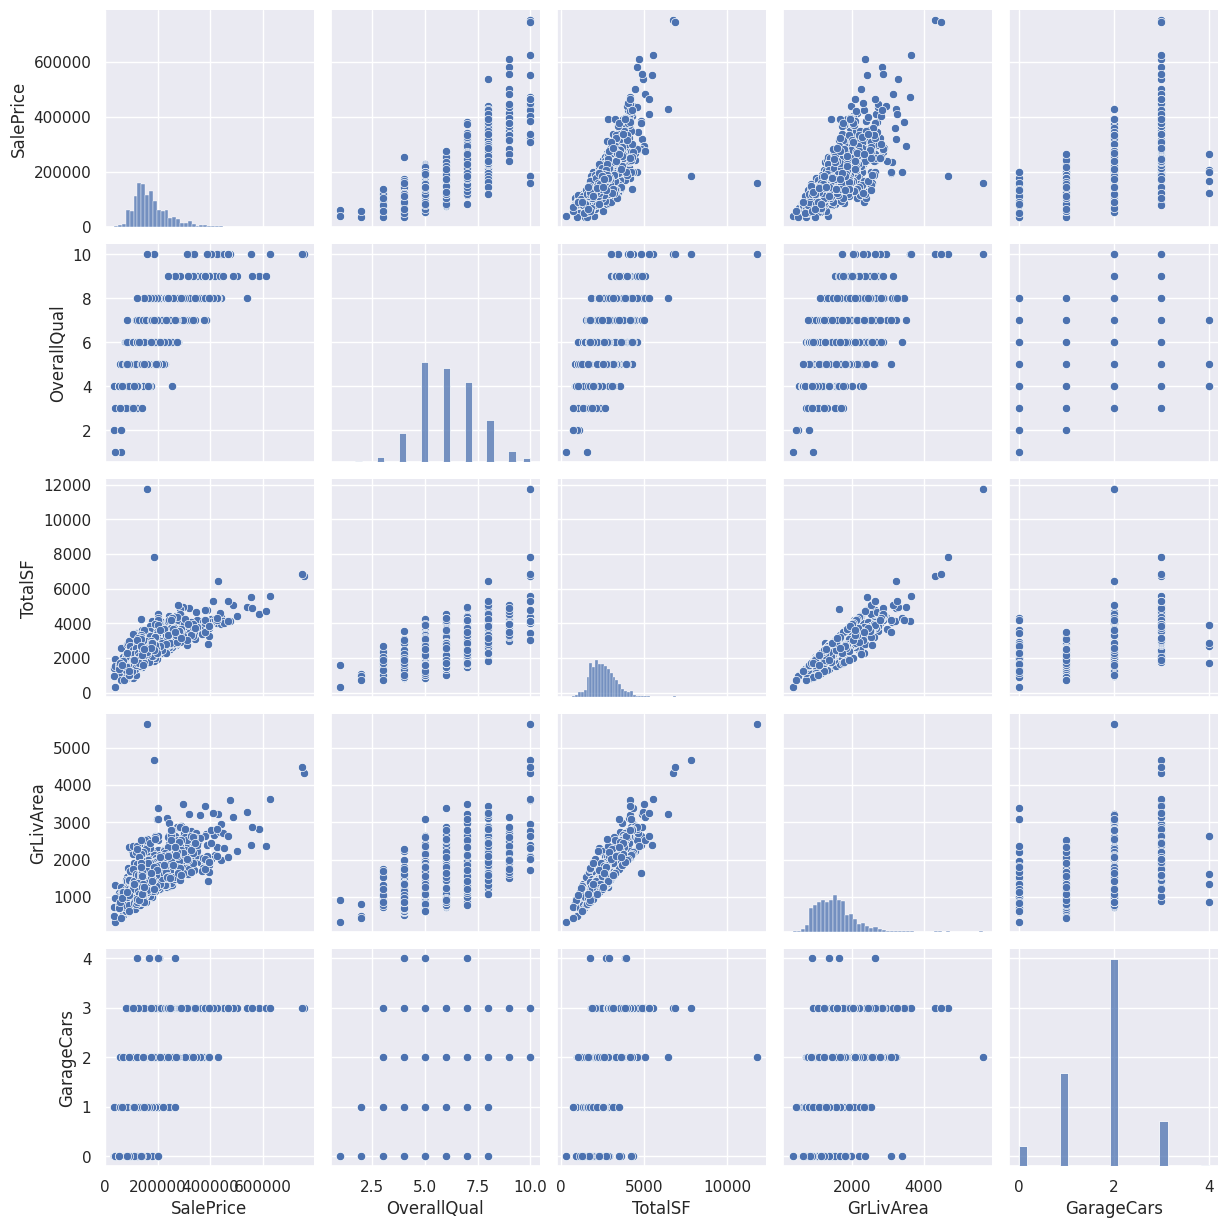

In [17]:
#scatterplot
sns.set_theme()
cols = ['SalePrice', 'OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars']
sns.pairplot(df_fe[cols], size = 2.5)
plt.show();

In [18]:
df_fe[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


## Identificación de variables relevantes

Concluido este ejercicio inicial, es posible filtrar la hoja de cálculo y concentrarse en las variables con *Expectativa Alta*. Posteriormente, se pueden generar gráficos de dispersión entre dichas variables y `SalePrice`, ajustando la columna *Conclusión* como validación o corrección de las expectativas iniciales.  

Tras llevar a cabo este proceso, se identificó que las siguientes variables pueden desempeñar un papel fundamental en el problema:  

- **OverallQual** (aunque presenta cierta desventaja, pues se desconoce su método exacto de cálculo; un ejercicio interesante consistiría en predecir `OverallQual` empleando las demás variables disponibles).  
- **TotalSF**.  
- **GrLivArea**.  

El resultado fue la selección de dos variables asociadas al segmento *edificio* (`OverallQual` y `YearBuilt`) y dos vinculadas al segmento *espacio* (`TotalBsmtSF` y `GrLivArea`).  

Este hallazgo puede resultar algo inesperado, ya que contradice el principio tradicional del sector inmobiliario que enfatiza la importancia exclusiva de la “ubicación”. Es posible que este procedimiento preliminar haya sido excesivamente exigente con las variables categóricas. Por ejemplo, se esperaba que la variable `Neighborhood` tuviera mayor relevancia; sin embargo, fue descartada tras la exploración inicial de los datos. Esto podría deberse al uso de diagramas de dispersión en lugar de diagramas de caja, los cuales son más adecuados para representar variables categóricas.  

Es importante destacar que la manera en que visualizamos los datos influye de forma significativa en nuestras conclusiones.  